In [90]:
import math
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.circuit.library import QFT
%matplotlib inline

https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html#example2

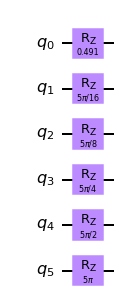

In [91]:
# number to convert from DEC base to Fourier base
number_dec = 5

n_qubits = 6
qc = QuantumCircuit(n_qubits, name='qc_fourier_base')

exp = 0
for i in range(n_qubits, 0, -1):
    qc.rz(number_dec*math.pi/2**exp, i - 1)  
    exp = exp + 1

qc_five = qc.to_gate()
control_gate_five = qc_five.control()

qc.draw(output="mpl")

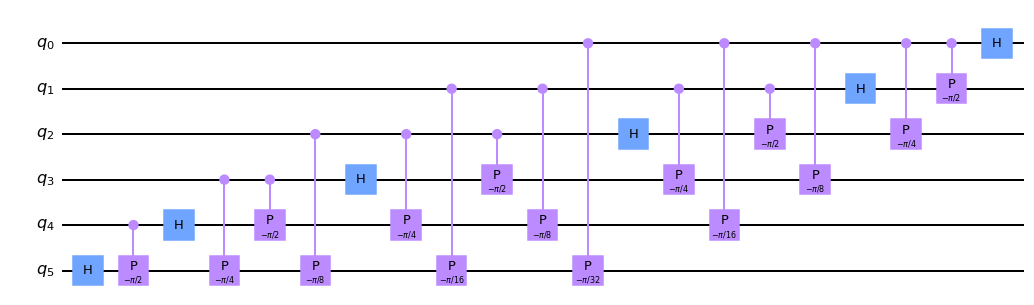

In [92]:
qft_gate_inv = QFT(num_qubits=n_qubits, approximation_degree=0, do_swaps=False, inverse=True, insert_barriers=False, name='qft_gate_inv')
qft_gate_six_inverse = qft_gate_inv.to_gate()

qft_gate_inv.draw(output="mpl")

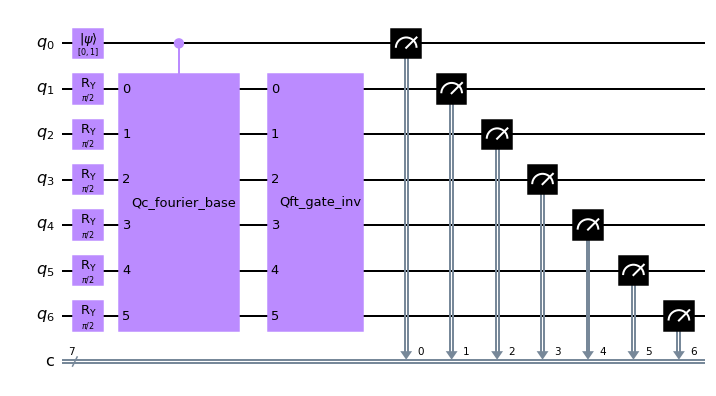

In [105]:
qc_final = QuantumCircuit(n_qubits + 1, n_qubits + 1)

qc_final.initialize([0,1], 0)
qc_final.ry(math.pi/2,range(1,7))
qc_final.append(control_gate_five, [0,1,2,3,4,5,6])
qc_final.append(qft_gate_six_inverse, [1,2,3,4,5,6])

qc_final.measure(range(7), range(7))


qc_final.draw(output="mpl")

In [106]:
# simulators
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")

In [107]:
sim_state_vector = qiskit.execute(qc_final, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc_final, backend=qasm_sim, shots=1024).result().get_counts()

{'1010001': 1024}


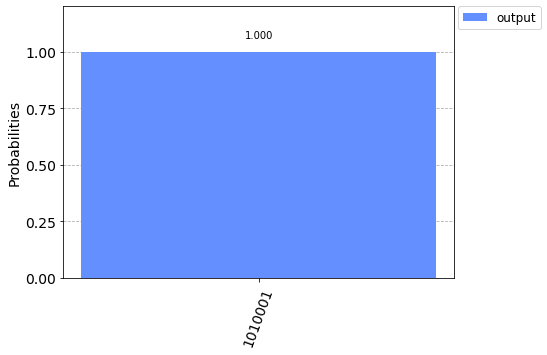

In [108]:
print(sim_counts)
plot_histogram([sim_counts], legend=['output'])